## Practical session with Trustpilot review data

In [1]:
%matplotlib inline
import pandas as pd

### Looking at the data

In [2]:
!head trustpilot_reviews_dk.tsv

user_id	name	birth_year	gender	company	rating	review_len
2008915	Anders Harvest	1955	M	www.autoeurope.dk	4	15
707613	Gordon Steffensen	1955	M	www.laptops.dk	5	77
707613	Gordon Steffensen	1955	M	www.cpt.dk	5	1292
707613	Gordon Steffensen	1955	M	www.philipsonwine.com	5	95
899885	tue	1979	M	smykkemester.dk	5	332
899885	tue	1979	M	www.rbsalg.dk	5	273
899885	tue	1979	M	www.dvcenter.dk	5	506
899885	tue	1979	M	www.3.dk	5	600
899885	tue	1979	M	carhartt-wip.dk	5	396


In [3]:
reviews = pd.read_csv("trustpilot_reviews_dk.tsv", sep="\t")

In [4]:
reviews.head()

,user_id,name,birth_year,gender,company,rating,review_len
0,2008915,Anders Harvest,1955,M,www.autoeurope.dk,4,15
1,707613,Gordon Steffensen,1955,M,www.laptops.dk,5,77
2,707613,Gordon Steffensen,1955,M,www.cpt.dk,5,1292
3,707613,Gordon Steffensen,1955,M,www.philipsonwine.com,5,95
4,899885,tue,1979,M,smykkemester.dk,5,332


In [5]:
reviews.tail(3)

,user_id,name,birth_year,gender,company,rating,review_len
501537,690344,Michael Wennergren Kruse,1985,M,fnebs.com,5,303
501538,690344,Michael Wennergren Kruse,1985,M,www.dustinhome.dk,5,57
501539,690344,Michael Wennergren Kruse,1985,M,qiphe.com,5,362


### Making a new column `age` based on existing column `birth_year`

In [6]:
reviews['age'] = 2014 - reviews.birth_year

### Plotting age distribution

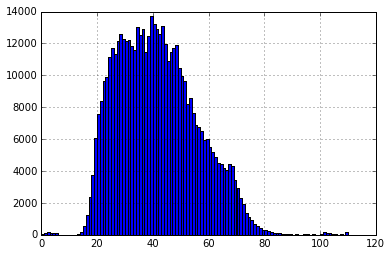

In [7]:
reviews.age.hist(bins=range(0,120))

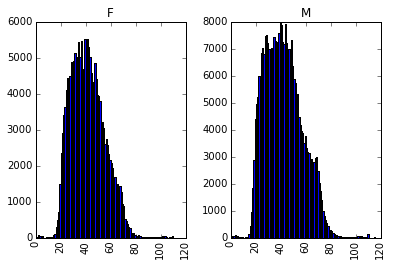

In [8]:
reviews.age.hist(by=reviews.gender, bins=range(0,120));

### Getting rid of outliers

In [9]:
within_valid_age_range = (reviews.age > 16) & (reviews.age < 80)
within_valid_age_range

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
          ... 
501510    True
501511    True
501512    True
501513    True
501514    True
501515    True
501516    True
501517    True
501518    True
501519    True
501520    True
501521    True
501522    True
501523    True
501524    True
501525    True
501526    True
501527    True
501528    True
501529    True
501530    True
501531    True
501532    True
501533    True
501534    True
501535    True
501536    True
501537    True
501538    True
501539    True
Name: age, dtype: bool

In [10]:
within_valid_age_range.sum() / float(len(within_valid_age_range))

0.99024604219005463

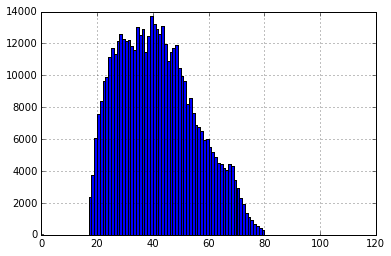

In [11]:
reviews = reviews[within_valid_age_range]
reviews.age.hist(bins=range(0,120));

### Correlations

In [12]:
reviews[['rating', 'review_len']].corr()

,rating,review_len
rating,1.000000,-0.465672
review_len,-0.465672,1.000000


### Group behavior

In [13]:
counts = reviews.groupby(['gender', 'rating']).age.count()
by_gender_and_rating = counts.unstack('gender')
by_gender_and_rating

gender,F,M
rating,,
1,13933,33094
2,5536,12680
3,7403,13106
4,25291,41665
5,135246,199801


In [14]:
norm_by_gender_and_rating = (by_gender_and_rating / by_gender_and_rating.sum()) # Broadcast
norm_by_gender_and_rating

gender,F,M
rating,,
1,0.074345,0.110186
2,0.029540,0.042218
3,0.039502,0.043636
4,0.134951,0.138723
5,0.721662,0.665236


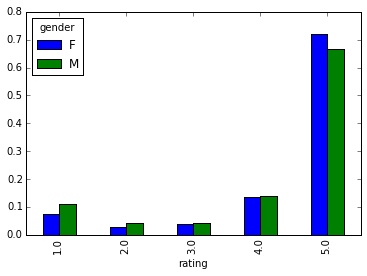

In [15]:
norm_by_gender_and_rating.plot(kind='bar');

### Filtering

Only keep companies with at least 50 reviews

In [16]:
medium_companies = reviews.groupby('company').filter(lambda g: len(g) >= 50)

### Aggregation

Compute a single value for each group. Here it is the percentage of male reviewers

In [17]:
def male_pct(series):
    counts  = series.value_counts()
    if 'M' in counts:
        return counts.ix['M'] / float(counts.sum())
    else:
        return 0

pct_males = medium_companies.groupby('company').gender.aggregate(male_pct)

In [18]:
pct_males.order(ascending=True)

company
www.carmakoma.com          0.000000
kageoplevelser.dk          0.000000
www.ginatricot.dk          0.014706
nailmania.dk               0.014778
www.kids-world.dk          0.019868
www.nail4you.dk            0.020000
www.tp-kjoler.dk           0.020833
www.tikarideudstyr.dk      0.022222
www.b4beauty.dk            0.023148
www.hugin-mugin.com        0.023529
www.solo.dk                0.023973
www.smaahjerter.dk         0.024719
www.trendpal.dk            0.026667
www.larvefoedder.dk        0.029851
ba10.dk                    0.031250
www.fashionforme.dk        0.032362
www.billige-teste.dk       0.036082
www.chopin.dk              0.037383
www.baby.dk                0.040000
www.bocajeans.com          0.040816
www.farsibella.dk          0.043165
www.denckerdeluxe.dk       0.044444
teenstyle.dk               0.045455
www.mamaslife.dk           0.048387
www.bykier.dk              0.050473
www.filiokus.dk            0.052288
www.tinyzone.dk            0.053498
www.janeiredale.dk  

What is the most balanced company?

In [19]:
(pct_males - 0.5).abs().order().head(50)

company
www.boligbasen.dk           0.000000
www.boligportal.dk          0.000000
www.jysk-diner.dk           0.000000
www.coffeebeansonline.eu    0.000000
sovn-comfort.dk             0.000000
www.familieadvokaten.dk     0.000000
www.netdate.dk              0.000000
www.klodskassen.dk          0.001002
www.dvdoo.dk                0.002170
www.veracura.dk             0.002857
www.sport24.dk              0.002976
lenson.dk                   0.003597
www.kitchenone.dk           0.003726
www.gucca.dk                0.003798
www.synoptik.dk             0.005376
shopsport.dk                0.005747
www.stepnote.dk             0.005882
www.ebay.dk                 0.006173
mempolering.dk              0.006173
dagensbedste.dk             0.006757
www.gavekortet.dk           0.006849
www.irma.dk                 0.007042
www.sport24outlet.dk        0.007463
www.filmudsalg.dk           0.007669
www.sneakershop.dk          0.007692
repfone.dk                  0.007937
www.g.dk                    0.